Denoising the Data from a signal

In [ ]:
# first we are importing the packages numpy and matplot lib
import numpy as np
import matplotlib.pyplot as plt

C:\Users\dell\.conda\envs\General\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\dell\.conda\envs\General\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\dell\.conda\envs\General\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [ ]:
# here we are giving a unique font and figure size for the plot
plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size':18})

In [ ]:
# time stamp of 0.001 samples per second
dt = 0.001
# create a data set that goes from time 0 to time 1 with an interval of dt i.e 0.001
t = np.arange(0,1,dt)
# the clean frequency that is the sum of 2 sin waves freq = 50 , 120
f = np.sin(2*np.pi*50*t)+np.sin(2*np.pi*120*t)
f_clean = f
# creating some random frequency that can be considered as noise signal
f = f+2.5*np.random.randn(len(t))

<ipython-input-4-23cf6580b046>:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f,color='c',LineWidth=1.5,label='Noisy')
<ipython-input-4-23cf6580b046>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f_clean,color='k',LineWidth=2,label='Clean')


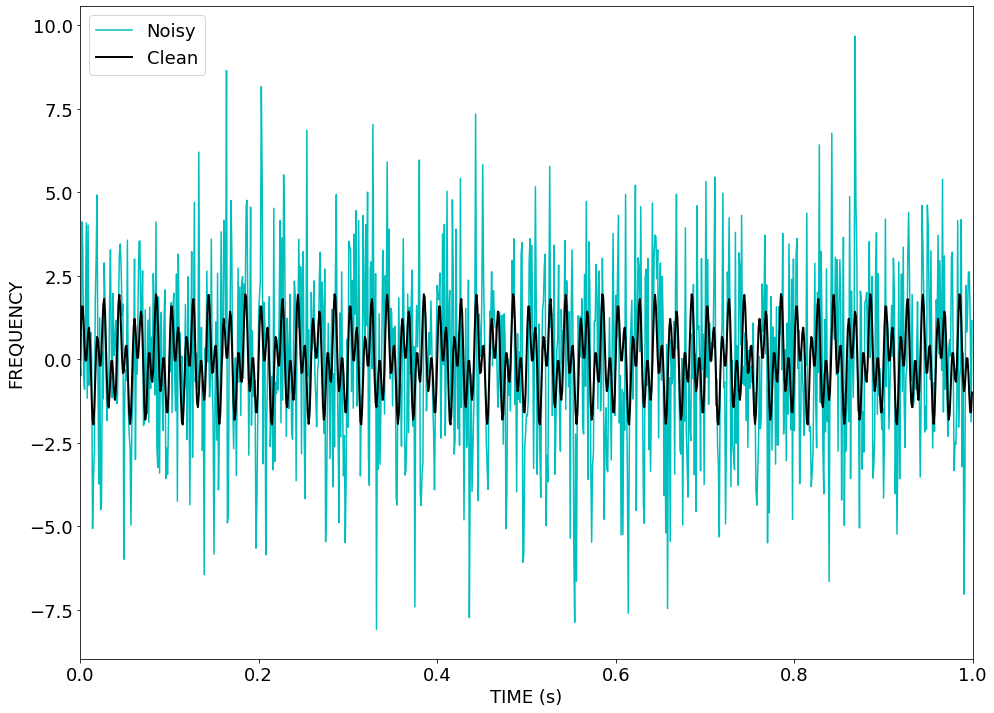

In [ ]:
plt.plot(t,f,color='c',LineWidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',LineWidth=2,label='Clean')
plt.xlim(t[0],1.0)
plt.xlabel('TIME (s)')
plt.ylabel('FREQUENCY')
plt.legend()
plt.show()

In [ ]:
## Compute the FFt
n = len(t)
# data is f and len of n
# f is in a vector to get f hat in the new vector after fft
fhat=np.fft.fft(f,n)
#print(f)
#print(fhat)
# power disribution
PSD = fhat*np.conj(fhat)/n
#print(PSD)
freq=(1/(dt*n))*np.arange(n)
L=np.arange(1,np.floor(n/2),dtype = 'int')

<ipython-input-6-dd2ebd3b9b76>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f,color='c',LineWidth=1.5,label='Noisy')
<ipython-input-6-dd2ebd3b9b76>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f_clean,color='k',LineWidth=1.5,label='clean')
<ipython-input-6-dd2ebd3b9b76>:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq[L],PSD[L],color='c',LineWidth=2,label='Noisy')
C:\Users\dell\.conda\envs\General\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


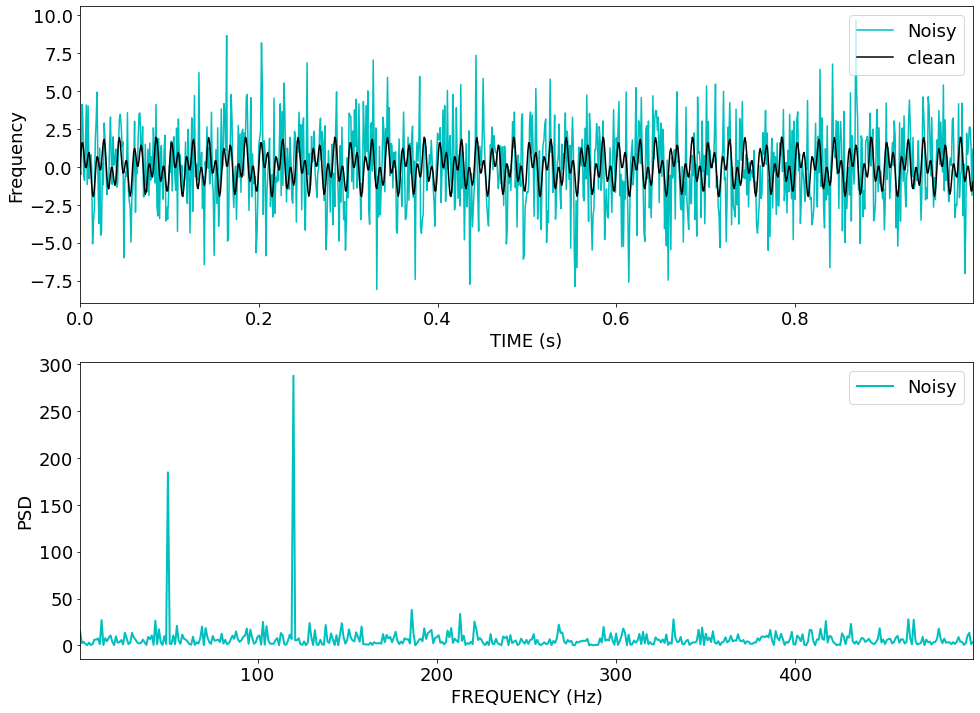

In [ ]:
fig,axs=plt.subplots(2,1)
plt.sca(axs[0])
plt.plot(t,f,color='c',LineWidth=1.5,label='Noisy')
axs[0].set_xlabel('TIME (s)')
axs[0].set_ylabel('Frequency')
plt.plot(t,f_clean,color='k',LineWidth=1.5,label='clean')
axs[1].set_xlabel('FREQUENCY (Hz)')
axs[1].set_ylabel('PSD')
plt.xlim(t[0],t[-1])
plt.legend()
 
plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c',LineWidth=2,label='Noisy')
#plt.plot(t,f_clean,color='k',LineWidth=1.5,label='clean')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()
# x axis is the power spectrum it is in hertz depicting the power for each frequency
#the y axis is the value for the power spectrum

In [ ]:
indices = PSD>100
PSDclean = PSD*indices
fhat=indices*fhat
ffilt = np.fft.ifft(fhat)

<ipython-input-8-a456538a3f82>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f,color='c',LineWidth=1.5,label='Noisy')
<ipython-input-8-a456538a3f82>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f_clean,color='k',LineWidth=2,label='Clean')
<ipython-input-8-a456538a3f82>:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,ffilt,color='k',LineWidth=2,label='Clean')
C:\Users\dell\.conda\envs\General\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-8-a456538a3f82>:23: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and sup

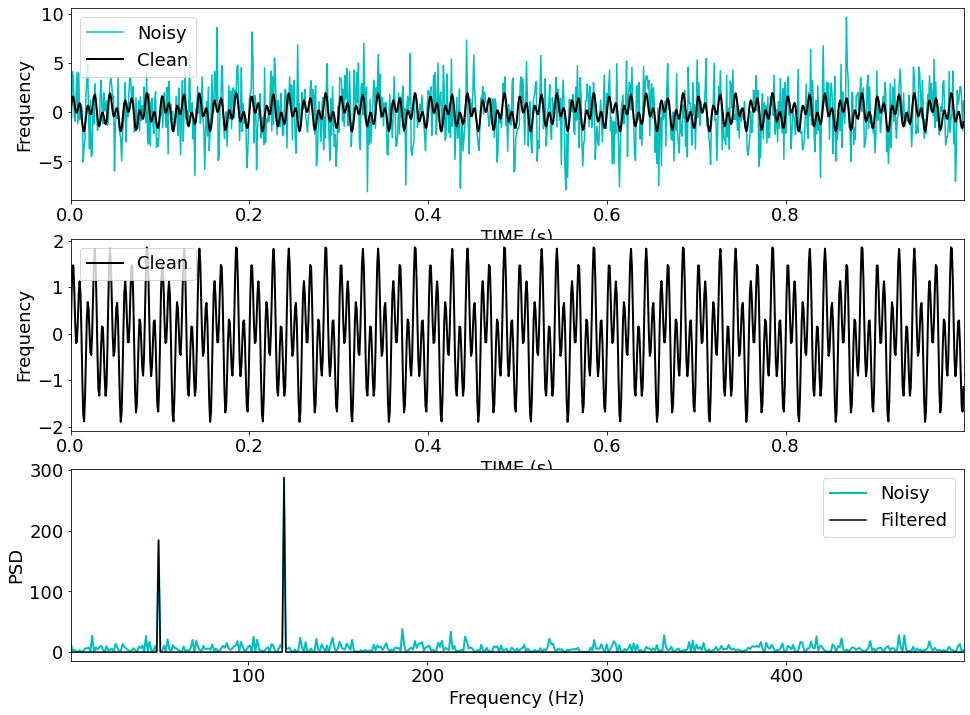

In [ ]:
fig,axs = plt.subplots(3,1)

# both together
plt.sca(axs[0])
axs[0].set_ylabel('Frequency')
axs[0].set_xlabel('TIME (s)')
plt.plot(t,f,color='c',LineWidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',LineWidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

# only the clean
plt.sca(axs[1])
axs[1].set_ylabel('Frequency')
axs[1].set_xlabel('TIME (s)')
plt.plot(t,ffilt,color='k',LineWidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('PSD')
plt.plot(freq[L],PSD[L],color='c',LineWidth=2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='k',LineWidth=1.5,label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

For an given audio file

In [ ]:
# here we are giving a unique font and figure size for the plot
plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size':18})

<ipython-input-10-7fec5afc38a1>:11: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  audio_f = np.fromstring(audio_f, "Int16")
<ipython-input-10-7fec5afc38a1>:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  audio_f = np.fromstring(audio_f, "Int16")


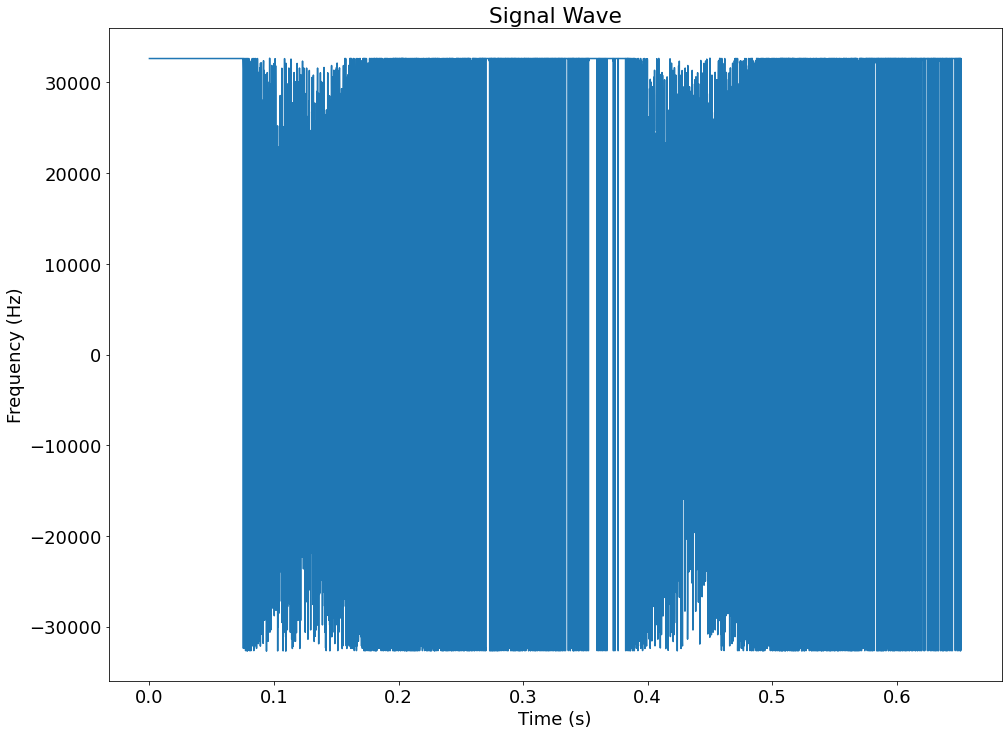

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys


spf = wave.open("dog_bark_x.wav", "r")

# Extract Raw Audio from Wav File
audio_f = spf.readframes(-1)
audio_f = np.fromstring(audio_f, "Int16")
fs = spf.getframerate()

# If Stereo
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)


Time = np.linspace(0, len(audio_f) / fs, num=len(audio_f))

plt.figure(1)
plt.title("Signal Wave")
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.plot(Time, audio_f)
plt.show()

In [ ]:
# the clean frequency that is the sum of 2 sin waves freq = 50 , 120
f_clean = audio_f

# creating some random frequency that can be considered as noise signal
f_noise_audio = audio_f+40000*np.random.randn(len(Time))

<ipython-input-12-51a7b72d20f3>:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(Time,f_noise_audio,color='c',LineWidth=1.5,label='Noisy')
<ipython-input-12-51a7b72d20f3>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(Time,f_clean,color='r',LineWidth=2,label='Clean')


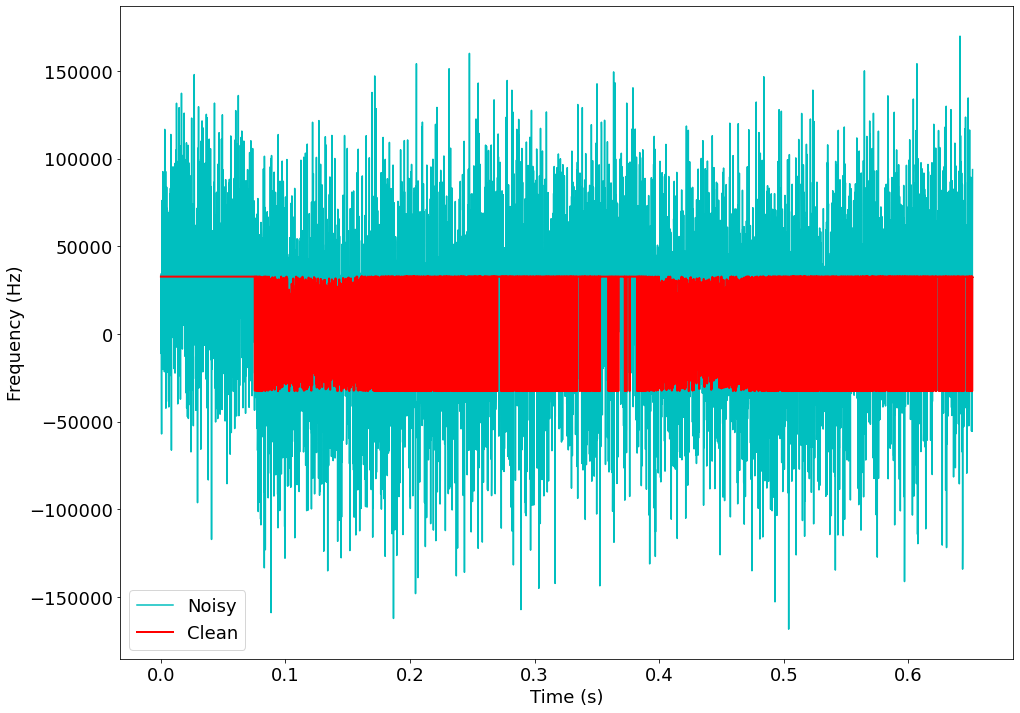

In [ ]:
plt.plot(Time,f_noise_audio,color='c',LineWidth=1.5,label='Noisy')
plt.plot(Time,f_clean,color='r',LineWidth=2,label='Clean')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.legend()

In [ ]:
## Compute the FFt
n = len(Time)
# data is f and len of n
# f is in a vector to get f hat in the new vector after fft
fhat=np.fft.fft(f_noise_audio,n)
# power disribution
PSD = fhat*np.conj(fhat)/n
freq=(1/(dt*n))*np.arange(n)
L=np.arange(1,np.floor(n/2),dtype = 'int')


<ipython-input-15-e864b308e910>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(Time,f_noise_audio,color='c',LineWidth=1.5,label='Noisy')
<ipython-input-15-e864b308e910>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(Time,f_clean,color='k',LineWidth=1.5,label='clean')
<ipython-input-15-e864b308e910>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq[L],PSD[L],color='c',LineWidth=2,label='Noisy')
C:\Users\dell\.conda\envs\General\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


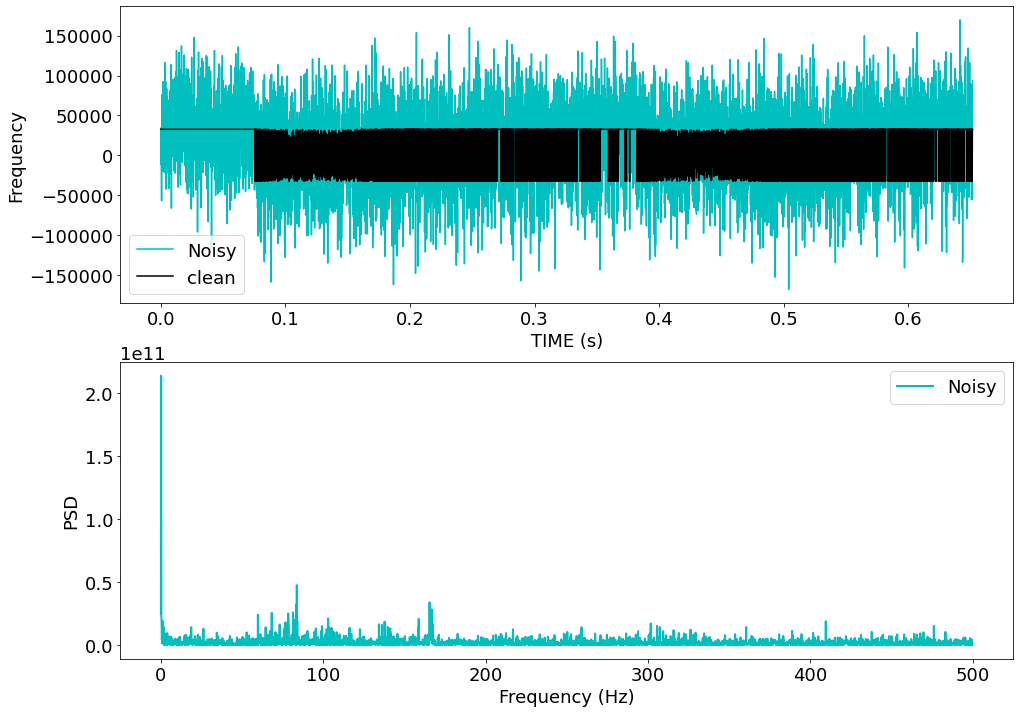

In [ ]:
fig,axs=plt.subplots(2,1)
plt.sca(axs[0])
plt.plot(Time,f_noise_audio,color='c',LineWidth=1.5,label='Noisy')
plt.plot(Time,f_clean,color='k',LineWidth=1.5,label='clean')
axs[0].set_ylabel('Frequency')
axs[0].set_xlabel('TIME (s)')
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c',LineWidth=2,label='Noisy')
axs[1].set_ylabel('PSD')
axs[1].set_xlabel('Frequency (Hz)')
plt.legend()
# x axis is the power spectrum it is in hertz depicting the power for each frequency
#the y axis is the value for the power spectrum

In [ ]:
indices = PSD>20000000000
PSDclean = PSD*indices
fhat=indices*fhat
ffilt = np.fft.ifft(fhat)

<ipython-input-17-4f9f69693f83>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(Time,f_noise_audio,color='c',LineWidth=1.5,label='Noisy')
<ipython-input-17-4f9f69693f83>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(Time,f_clean,color='k',LineWidth=2,label='Clean')
<ipython-input-17-4f9f69693f83>:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq[L],PSD[L],color='c',LineWidth=2,label='Noisy')
C:\Users\dell\.conda\envs\General\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-17-4f9f69693f83>:14: MatplotlibDeprecationWarning: Case-insensitive properties w

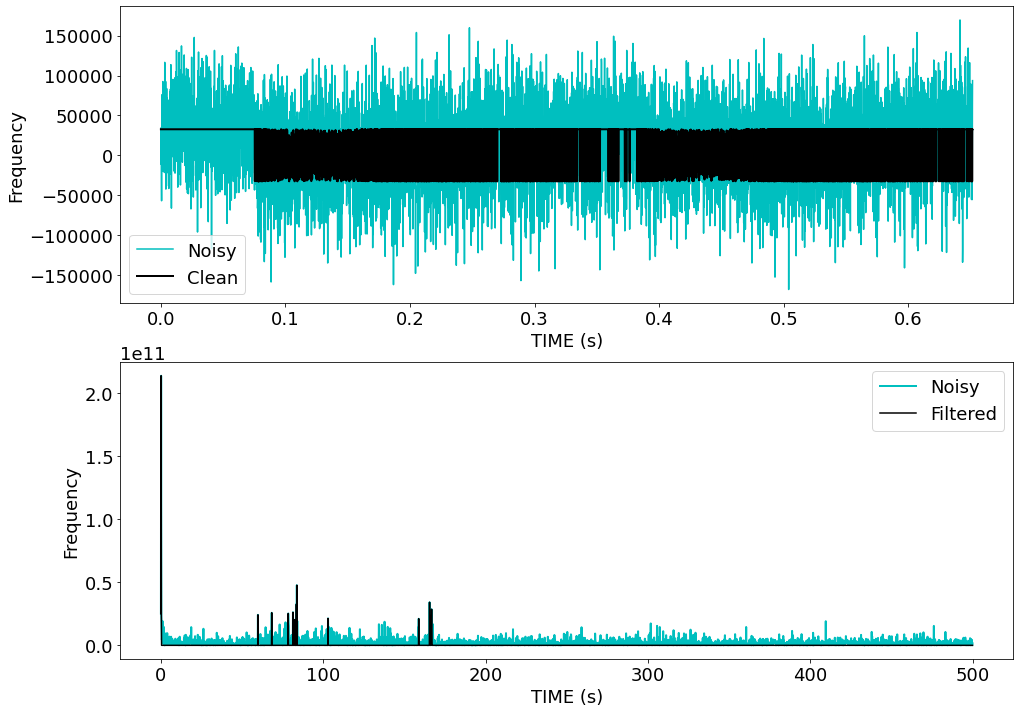

In [ ]:
fig,axs = plt.subplots(2,1)

# both together
plt.sca(axs[0])
plt.plot(Time,f_noise_audio,color='c',LineWidth=1.5,label='Noisy')
plt.plot(Time,f_clean,color='k',LineWidth=2,label='Clean')
axs[0].set_ylabel('Frequency')
axs[0].set_xlabel('TIME (s)')

plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c',LineWidth=2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='k',LineWidth=1.5,label='Filtered')
axs[1].set_ylabel('Frequency')
axs[1].set_xlabel('TIME (s)')

plt.legend()

plt.show()